## Observations and Insights 

Three Observations:
1. The Mice test subjects were almost equallt divided between male and females and therefore it is unlikely that gender played a role in the results.
2. Capomulin and Ramicane appear to be the most successful in reducing the tumor volumns overall.
3. Ketapril had the heighest Variance and Standard Deviation for tumor volumn which means its results varied more in terms of tumor size in it's subjects, more than any other drug.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Remove possible duplicates Timepoints per Mouse ID
study_results = study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'first')

# Combine the data into a single dataset
merged_df= pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Find the mean, median, variance, standard deviation, and SEM of the tumor volumn grouped by regimen 
mean_vol = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_vol = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_vol = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_vol = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_vol = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Create the dataframe to hold the summary stats 
summary_stats_df = pd.DataFrame({'Mean': mean_vol,
                                'Median': med_vol,
                                'Variance': var_vol,
                                'Standard Deviation': std_vol,
                                'SEM': sem_vol})
summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [77]:
#Generate a bar plot using both Pandas's DataFrame.plot() that shows the number of total mice for each treatment regimen throughout the course of the study.
#Find the number of mice per regimen 
regimen_data = merged_df.groupby('Drug Regimen')
mouse_count=regimen_data['Mouse ID'].count() 
mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

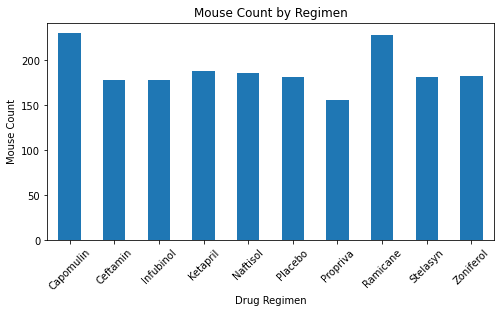

<Figure size 432x288 with 0 Axes>

In [79]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
regimen_chart=mouse_count.plot(kind='bar', title = 'Mouse Count by Regimen', figsize = (8,4))
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Mouse Count")
plt.xticks(rotation=45)

plt.show()
plt.tight_layout()





<Figure size 576x288 with 0 Axes>

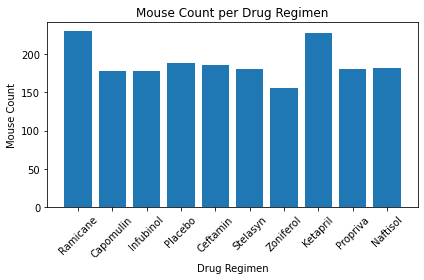

<Figure size 576x288 with 0 Axes>

In [100]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Put mouse counts grouped by drug regimen into a dataframe 
regimen_counts = pd.DataFrame(mouse_count).reset_index()
regimen_counts.columns = ["Drug Regimen", "Mouse Count"]
regimen_counts

# Set the x-axis 
drugs=merged_df["Drug Regimen"].unique()
x_axis = drugs

# Plot the Bar Chart
plt.bar(x_axis, regimen_counts["Mouse Count"])

# Fortmat Graph
plt.xticks(rotation="45")
plt.title("Mouse Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.tight_layout()
plt.figure(figsize=(8,4))


In [171]:
# Find the total of each gender
gender_groups = mouse_metadata.groupby(["Mouse ID", "Sex"])
gender_groups_df=pd.DataFrame((gender_groups.size()).groupby(["Sex"]).count())
gender_groups_df.columns=["Total Mice"]
gender_groups_df.reset_index()
gender_groups_df





,Total Mice
Sex,
Female,124
Male,125


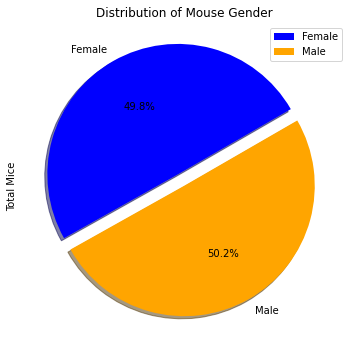

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors= ['blue','orange']
explode=(0.1,0)
gender_pie=gender_groups_df.plot(kind="pie",y="Total Mice", title="Distribution of Mouse Gender", explode=explode, autopct="%1.1f%%", colors=colors, figsize=(6,6), shadow= "true", startangle=30)


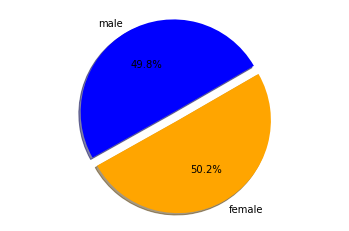

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors= ["blue","orange"]
explode = (0.1,0)
genders=["male", "female"]
counts=[124,125]
plt.pie(counts, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=30)
plt.axis("equal")


plt.show()

## Quartiles, Outliers and Boxplots

In [223]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cap = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin",:]
ram = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane", :]
inf = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol", :]
ceft = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin", :]
cap.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [229]:
cap_final = cap.groupby('Mouse ID').max()['Timepoint']
cap_final_vol = pd.DataFrame(cap_final)
cap_final_merge = pd.merge(cap_final_vol, merged_df, on=("Mouse ID","Timepoint"),how="left")

tumors = cap_final_merge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [232]:
ram_final = ram.groupby('Mouse ID').max()['Timepoint']
ram_final_vol = pd.DataFrame(ram_final)
ram_final_merge = pd.merge(ram_final_vol, merged_df, on=("Mouse ID","Timepoint"),how="left")

tumors_ram = ram_final_merge["Tumor Volume (mm3)"]

quartiles_ram = tumors_ram.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

print(f"The lower quartile of temperatures is: {lowerq_ram}")
print(f"The upper quartile of temperatures is: {upperq_ram}")
print(f"The interquartile range of temperatures is: {iqr_ram}")
print(f"The the median of temperatures is: {quartiles_ram[0.5]} ") 
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Ramicane potential outliers could be values below {lower_bound_ram} and above {upper_bound_ram} could be outliers.")


The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [233]:
inf_final = inf.groupby('Mouse ID').max()['Timepoint']
inf_final_vol = pd.DataFrame(inf_final)
inf_final_merge = pd.merge(inf_final_vol, merged_df, on=("Mouse ID","Timepoint"),how="left")

tumors_inf = inf_final_merge["Tumor Volume (mm3)"]

quartiles_inf = tumors_inf.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

print(f"The lower quartile of temperatures is: {lowerq_inf}")
print(f"The upper quartile of temperatures is: {upperq_inf}")
print(f"The interquartile range of temperatures is: {iqr_inf}")
print(f"The the median of temperatures is: {quartiles_inf[0.5]} ") 
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Ramicane potential outliers could be values below {lower_bound_inf} and above {upper_bound_inf} could be outliers.")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Ramicane potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [234]:
ceft_final = ceft.groupby('Mouse ID').max()['Timepoint']
ceft_final_vol = pd.DataFrame(ceft_final)
ceft_final_merge = pd.merge(ceft_final_vol, merged_df, on=("Mouse ID","Timepoint"),how="left")

tumors_ceft = ceft_final_merge["Tumor Volume (mm3)"]

quartiles_ceft = tumors_ceft.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft

print(f"The lower quartile of temperatures is: {lowerq_ceft}")
print(f"The upper quartile of temperatures is: {upperq_ceft}")
print(f"The interquartile range of temperatures is: {iqr_ceft}")
print(f"The the median of temperatures is: {quartiles_ceft[0.5]} ") 
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)
print(f"Ramicane potential outliers could be values below {lower_bound_ceft} and above {upper_bound_ceft} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Ramicane potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


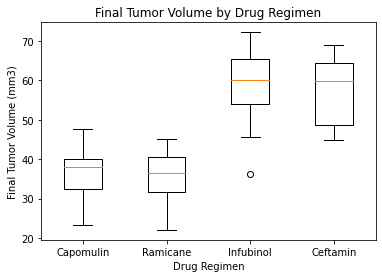

In [236]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [tumors, tumors_ram, tumors_inf, tumors_ceft]

fig1, ax1 =plt.subplots()
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

ax1.boxplot(data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

In [200]:
# Generate a dataframe to prep for the line plot
time_and_tumor=merged_df[merged_df["Mouse ID"].isin(["m957"])]
time_and_tumor_df=time_and_tumor.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
time_and_tumor_df= time_and_tumor_df.reset_index(drop=True)
time_and_tumor_df

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,45.622381
2,10,46.414518
3,15,39.804453
4,20,38.909349
5,25,37.695432
6,30,38.212479
7,35,32.562839
8,40,32.947615
9,45,33.329098


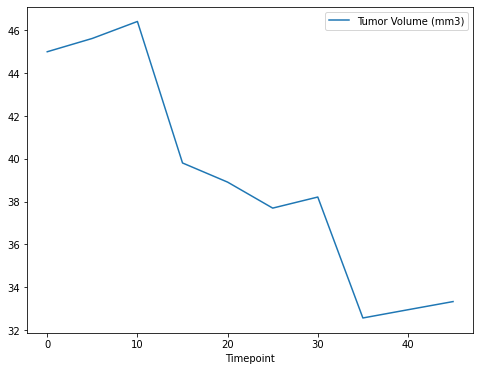

In [211]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_and_tumor_df.set_index('Timepoint').plot(figsize=(8,6))
plt.show()

In [258]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mean = cap.groupby(["Mouse ID"]).mean()
cap_mean.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


TypeError: 'list' object is not callable

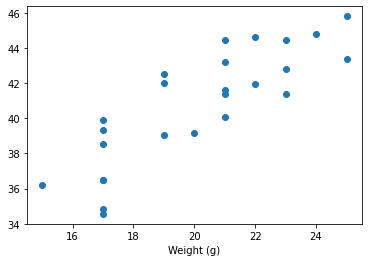

In [264]:
x_values=cap_mean["Weight (g)"]
y_values=cap_mean['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [265]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor_co=round(st.pearsonr(cap_mean["Weight (g)"], cap_mean['Tumor Volume (mm3)'])[0],2) 
print(f"The correlation between mouse weight and the average tumor volumn is {cor_co}")

x_values=cap_mean["Weight (g)"]
y_values=cap_mean['Tumor Volume (mm3)']
lr_model=st.linregress(x_values, y_values)
lr_model

The correlation between mouse weight and the average tumor volumn is 0.84


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

TypeError: 'list' object is not callable

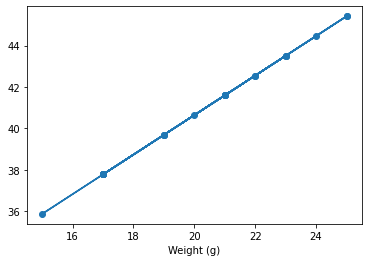

In [268]:
mslope=0.9544396890241045
intercept=21.552160532685015

x_values=cap_mean["Weight (g)"]
y_values=cap_mean['Tumor Volume (mm3)']

y_values =mslope*x_values+intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()